# Heart Rate Lab Review 


**This notebook is published on my github. It is publicly accessible, but you cannot save your changes to my github. Learning git & github is beyond the scope of this course. If you are familiar with github, you know that to do. If you don't know github, you can save a personal copy of the file to your google drive, so that you can save your changes and can access them at a later date**

This notebook is a continuation from previous classes:

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)
2. [Data Visualization](https://github.com/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb)


## Before we start

Some of the code today is going to be a bit complicated and I do not expect you to be able to write code like this on your own. 

However, we are covering some really important concepts and I expect you to be familiar with the underlying concepts rather than the implementation in Python. For example, we will talk about fitting models to observations from experient and we will explore some of the pitfalls.

**I need you to know:** 

- **what goes wrong with the polynomial models and why**
- **understand the components of the exponential model**
- **why the final model appears to be a good choice**

## Now lets get started 

The goal of today's exercise is to have a brief look at the Heart Rate data you collected during the lab. In the lab report you are be asked to perform some basic statistics on the data and to fit a model to our observations. 

In this notebook I will show you how to: 

- read in data from a google sheet into pandas
- perform basic statistics on rows and columns in a pandas data frame
- fit and evaluate different mathematical models to experimental data
- regognize the importance selecting an appropriate model 

We have previously covered how make a histogram using pandas. If you don't remember, have a look at the [Data Visualization] lecture (https://github.com/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb).

Because we are still suing pandas we have to import the pandas python module and we make it available with the name `pd`.
We will also be using [numpy](https://numpy.org/) a module that extends python for mathematics, science, and statistics. We import this as `np`.

In [1]:
# running this will import pandas and numpy.
import pandas as pd
import numpy as np

## Reading a google spreadsheet into a dataframe

If you are using google Colab you can easily load data from google sheets, which makes sense since they are both google products. Colab provides the appropriate functions that will authenticate you with google and will then load the google sheet. Doing so will promt a google account logon window. 

**Note that the below code will only work on Colab! If you chose to work with a different software you can also read a google sheet, but it is more complicated and it might be easier to just download the sheet to your computer as a csv or Excel file that you can then read into a dataframe.** 

In [111]:
from google.colab import auth  # This is the module that allows google to authenticate you
import gspread                 # This is the module to interact with a google sheet.  
from google.auth import default #autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

ModuleNotFoundError: No module named 'google'

In [2]:
# This cell opens the google sheet specified in the URL, selects the first sheet, 
# reads the data, and put it in a dataframe
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Orp3OuRCmQMoJOKCAk3CLwil_H4EzQiEjhvwWxBgeww/edit?usp=sharing')

worksheet =gsheets.sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# I am telling python here to use row #1 for the column names and the rest as data
df = pd.DataFrame(rows[2:], columns=rows[1])

# This bit of code is a bit complicated, but in essence I am telling python to treat all columns as numbers rather than objects
cols = list(df.columns) # this produces a list of column names 
print(cols) 
df[cols] = df[cols].apply(pd.to_numeric) # I now apply a conversion to all columns

df.head()

NameError: name 'gc' is not defined

In [8]:
# I am creating some sample data here. 
# If you have already loaded the data from the google sheet, there is no need to do this. 
data = {'Subject ID number':[1,2,3,4,5,6], 'Trial1':[64, 74, 66, 84, 64, 72], 
                          'Trial2':[66, 74, 61, 74, 64, 70], 'Trial3':[64, 72, 61, 74, 69, 71]}
df = pd.DataFrame(data)

In [9]:
print(df.shape)
df.head()

(6, 4)


,IDNo,Trial1,Trial2,Trial3
0,1,64,66,64
1,2,74,74,72
2,3,66,61,61
3,4,84,74,74
4,5,64,64,69


We now see that we have a dataframe with 4 colums, one for the Subject ID number and one for each trial. Now we can do some statistics on them. 

## Descriptive Statistics

The `describe()` method can always be used to calculate some of the most important descriptive statistics.  

In [ ]:
df.describe()

Howver, there are a lot more available in python. The table below lists the important descriptive statitics functions availabe for a pandas dataframe and their explanations:

    count(): The number of non-empty observations.
    sum(): The sum of the values.
    mean(): The average of the values.
    median(): The median of values.
    mode(): The mode of the values.
    std(): Standard deviation of values.
    skew(): The skewness of the values. 
    kurt(): The kurtosis (also called peakedness) of the value 
    max(): The largest of the values.
    min(): The smallest of the values.
    abs(): The absolute value of the values.
    prod(): Product of values.
    cumsum(): Cumulative sum of values.
    cumprod(): Cumulative product of values.
    

If you don't know what some of these are, I recommend to look them up on the internet. Also here is a [handy cheat-sheet with explanations of some of the most important descriptive statistics](https://res.cloudinary.com/dyd911kmh/image/upload/v1662111933/Marketing/Blog/Descriptive_Statistics_Cheat_Sheet.pdf). It does not contain things like [skewness](https://en.wikipedia.org/wiki/Skewness) though, which can also be really important for describing distributions. 

In [10]:
# Why don't you apply one of these for example the `mean()` to the dataframe df

# Complete the code below so that it calculates the statistics for one or more columns
df

SyntaxError: invalid syntax (<ipython-input-10-42f89e69d064>, line 4)

Having three trials for each resting heart rate is good, because it helps us to reduce random error in our measurements and to characterize the underlying uncertainty of the measurand. 

One way of doing so is to estimate the mean and standard deviation of the resting heart rate measurements for each subject. However, we just noticed that the `mean()` method operates on columns by default. Luckily there is a way of changing this behavior so that it operates on rows instead. 

I can calculate the average resting heart rate for each subject like this. I also assing this to a new column in the dataframe

In [11]:
df['MeanRHR'] = df[['Trial1', 'Trial2','Trial3']].mean(axis = 1)
df.head()

,IDNo,Trial1,Trial2,Trial3,MeanRHR
0,1,64,66,64,64.666667
1,2,74,74,72,73.333333
2,3,66,61,61,62.666667
3,4,84,74,74,77.333333
4,5,64,64,69,65.666667


The `axis` command specifies whether the method should be performed on rows (axis = 1) or colums (axis = 0).

Now give it a try and calculate the Standard Deviation (`std()`) of the resting hear rates and save it to a new column:

In [ ]:
# Complete the code below
df['StdRHR'] = 
# Feel free to add addtional columns for statistics if you would like to. 
df.head()

In [ ]:
# You can also try to create a histrogram of the resting heart rates. 
# Ask youself, which of the columns should you pick to do so. 

# Try it here. 


## Heart Rate Revocery 

We also measured during the lab how your heartrate recovers after exercise. Your recovery time depends on many factors such as your overall pyhiscal fitness, genetics, age, and so on. The rate of Heart Rate Recovery may also provide some information about your health. 

I am creating a sample dataset for Heart Rate Recovery below and read it into a new dataframe called `df_HRR`. You could also substitute in your own data (or read this in as from a spreadsheet). 

It is important to realize that you need to supply an appropriate time axis. Here I am assuming that measurements were taken every 20 seconds and to avoid me typping this our, I am using the `np.arange()` function that creates an ascending series of the same length as the heartrate samples. 

In [4]:
import numpy as np
import pandas as pd

# Create some data
heartrates = [187, 152 ,129 ,111 , 99 ,89 ,82,76 ,74, 71, 71, 73, 72, 71]
times = np.arange(len(heartrates))*20
print('time = %s ' % times)
df_HRR = pd.DataFrame(data={'Time':times, 'HeartRate':heartrates})
print('Shape of df: (%s, %s)'  % df.shape)
df_HRR.head()

NameError: name 't' is not defined

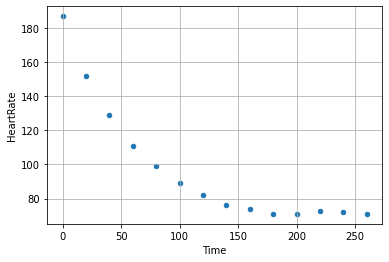

In [32]:
# Let's just plot this really quick as a plot of Time vs HearRate . 
# Remeber how you can do this.
# Remember that we have to select the data frame with the Resting Heart Rate (df_HRR) 
ax1 = df_HRR.plot(kind='scatter', x='Time', y='HeartRate', grid = True)

We see that the heartrate decreases with time as we are hoping to see and that there seems to be some time period after which the decrease has leveled off to the resting heart rate. 

### Modeling Heart Rate Recovery

Having a good model, helps us make accurate predictions of a phenomenon. Bad models can be worse than having no model at all, because they lead to decisions with disatrous outcomes. A model is only as good as the underlying data. This is often called *[garbage in garbage out](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out)*. 

Even more important than having good data itself, is having the expertise to select a good model. A model might fit the experimental data but may show really unexpected behavior in other circumstances. **This is bad!**

**Q: Before we continue, what kind of model would you expect to work on this data? You have already conducted the experiement have seen the data and should have made some observations.** 

In [ ]:
# You can enter your answer here. 


**Let's step back a minute to talk about models in general**

It is good practice to apply the most simple model and often that means a polynomial. 

Polynomials come in many types, also called orders, with commong polynoical types being linear, quadratic or cubic:
![POLYNOMIAL ORDERS](https://editor.analyticsvidhya.com/uploads/349141.png)

The higher the order of the polynomial the more curvy it becomes and the easier it is to fit points. 

You can also fit a polynomial of order 50. This would mean that the equation to be fitted would go up to powers of 50:

$y = a_0 + a_1x^1 + a_2x^2 + ... + a_{50}x^{50}$ 

This means there are 51 coefficients to be estimates ($a_0 \ldots a_{51}$).




### Let's start fitting data. 

Numpy provides a convenient function (`np.polyfit(x,y,order)`) to fit polynomials to data. We can use this to fit a first order polynomial to the data. 

Calling `np.polyfit(x,y,1)` with our observed values of time and the desired order (1), will return a set of coeffcients (i.e. the avlues for $a_0$ and $a_1$):

In [35]:
# we assume that x corresponds to time and y corresponds to HeartRate 
polynomialCoefficients_1 = np.polyfit(df_HRR['Time'],df_HRR['HeartRate'],1)
print(polynomialCoefficients_1)

[ -0.36956044 144.97142857]


We can then use another function `np.polyval(<list of coefficients>, <x-values>)` to generate estimates for y at the x values from the polynomial. 

We can save these to the dataframe: 

In [39]:
df_HRR['HR_Est_1']=np.polyval(polynomialCoefficients_1,df_HRR['Time'])
df_HRR.head()

,Time,HeartRate,HR_Est_1
0,0,187,144.971429
1,20,152,137.580220
2,40,129,130.189011
3,60,111,122.797802
4,80,99,115.406593


**How about you try this for polynomials of second order (quadratic) and 25th order.**

You can always play around with other orders as well and add them to the dataframe. 

In [44]:

# Complete the Code below to calculate the polynomial coefficients 
polynomialCoefficients_2  = np.polyfit() #  complete  np.polyfit for a second order polynomial
polynomialCoefficients_25 = np.polyfit() #  complete  np.polyfit for a 25th  order polynomial

print(polynomialCoefficients_2)
print(polynomialCoefficients_25)

[ 2.93097527e-03 -1.13161401e+00  1.75453571e+02]
[-2.68243048e-54  5.45878461e-52  1.82917381e-49  1.82171682e-47
 -5.14073367e-45 -2.86905859e-42 -6.70169010e-40 -4.64136675e-38
  2.95416925e-35  1.37658782e-32  2.68479535e-30 -9.08952309e-29
 -2.23890047e-25 -5.91298996e-23  9.63442800e-22  4.60336308e-18
  7.12811942e-16 -2.73085572e-13 -5.58777571e-11  2.74063868e-08
 -4.12701819e-06  3.18942174e-04 -1.35365554e-02  3.06654379e-01
 -4.44347520e+00  1.87000000e+02]


C:\Users\gerkentx\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:

# Now let's assign our estimated values for the heart rate to the dataframe. 

# Complete the code below: 
df_HRR['HR_Est_2']  = np.polyval() # complete np.polyval(<coef>,x) using the 2nd order polynomial coefficients
df_HRR['HR_Est_25'] = np.polyval() # complete np.polyval(<coef>,x) using the 25th order polynomial coefficients
df_HRR.head()

TypeError: _polyval_dispatcher() takes 2 positional arguments but 3 were given

Let's create a plot to see how our fits look. Beatiful!

<AxesSubplot:xlabel='Time', ylabel='HeartRate'>

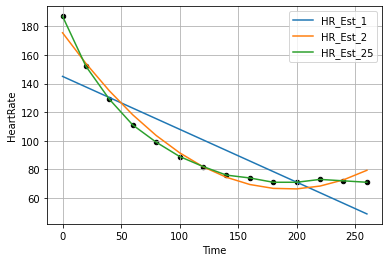

In [50]:
ax1 = df_HRR.plot(kind='scatter', x='Time', y='HeartRate', color = 'k')
df_HRR[['Time', 'HR_Est_1','HR_Est_2','HR_Est_25']].plot(x='Time', ax=ax1, grid = True)

The second order and 25th order polynomials seem to fit our data really well. The 25th order polynomical even connects all the measurements ... 

**Q: Is that something we would expect?**

### Evaluating our polynomials

We can put a number on our goodness of fit using the square of the correlation coefficient (also known as $R^2$) between the obsered HeartRate and the Estimatated Heart Rate for each of the models. 

Numpy has a nifty function that will give us the correlation coefficient `np.corrcoef`, which we can then square. Don't worry about the details here. You can always look up the function documentation by using `help(np.corrcoeff)` or in the [numpy manual](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html). 

In [53]:
r2_1 = (np.corrcoef(df_HRR['HeartRate'],df_HRR['HR_Est_1'])[0,1])**2
r2_2 = (np.corrcoef(df_HRR['HeartRate'],df_HRR['HR_Est_2'])[0,1])**2
r2_25 = (np.corrcoef(df_HRR['HeartRate'],df_HRR['HR_Est_25'])[0,1])**2

print('The 1st order polynomial has an R2 of: %3.2f' % (r2_1))
print('The 2nd order polynomial has an R2 of: %3.2f' % (r2_2))
print('The 25th order polynomial has an R2 of: %3.2f' % (r2_25))


The 1st order polynomial has an R2 of: 0.74
The 2nd order polynomial has an R2 of: 0.98
The 25th order polynomial has an R2 of: 1.00


This confirms our initial impression that the higher order polynomials seem to fit the data very well. 

But there are problems. 
**Have a look at the quadratic polynomial. What do you notice?**

**Do you think that the quadratic fit will provide a good heartrate reading after let's say 2000 seconds?**

In [55]:
# You can even use np.polyval to find out. 
HRR_Est_2000s = np.polyval(polynomialCoefficients_2,2000)
print(HRR_Est_2000s)

9636.126648351648


What might be the problem with the very high order polynomial. Well, it has a lot free parameters that can create wiggles, so it fits our data very well, but what happens if we evaluate the heart rate at a higher temporal resolution. 

Let's say instead of every 20 seconds, we estimate the heartrate every second

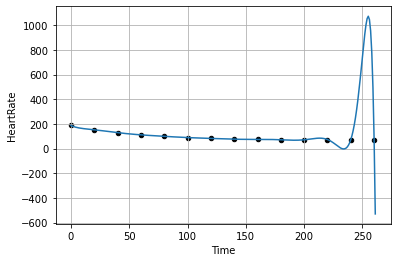

In [83]:
t_high_res = np.arange(0,262) # this will create a vector of times between 0 and 262 seconds with 1 s resolution. 
y_high_res = np.polyval(polynomialCoefficients_25,t_high_res) # we now evaluate the higher order polynomical on this 

import matplotlib.pyplot as plt
ax1 = df_HRR.plot(kind='scatter', x='Time', y='HeartRate', grid = True, color = 'k')
ax1 = plt.plot(t_high_res,y_high_res) # because this is not in the dataframe I add this to the plot using pyplot. 

### Curve fitting redux. 

We now found out that random polynomials are likely not going to do the job. They may fit the observed data well, but they don't represent the underlying process of heart rate recovery and then fail. 

Here is a comic about curve fitting that illustrates my main points ... (I like [xkcd](www.xkcd.com)).
![](https://imgs.xkcd.com/comics/curve_fitting.png)

**We need to make sure that the model we fit makes physical sense. This means we need to have an expectation on how the data behaves**. 

In the case of heart rate recovery, it makes sense to think about an exponential model, where after stopping the exercise,a high heart rate rapidly declines. As the heart rate declines the rate of change will become slower. 

Exponental decay can be mathematically described like this.

$Y = a + b e^{-kt}$ ,

    where a, b, and k are constants and 
          t is time 
          

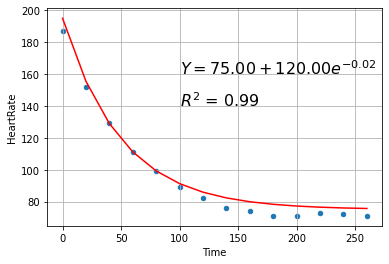

In [146]:
def func4(t, a, b, k):
    return a + b * np.exp(-k*t) 


a = 75
b = 120
k = 0.02

y_est = func4(x, a, b, k)

ax1 = df.plot(kind='scatter', x='Time', y='HeartRate', grid = True)
ax1 = plt.plot(x,y_est, color = 'r')
ax1 = plt.text(100, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$" % (a,b,k), fontsize = 16)
ax1 = plt.text(100, 140, r"$R^2$ = %3.2f" % (np.corrcoef(y,y_est)[0,1])**2 , fontsize = 16)


In [87]:
r"$Y = %3.2f +  %3.2f e^{- %3.2f t}$" % (a,b,k)

'$Y = 75.00 +  120.00 e^{- 0.40 t}$'

In [142]:
popt4, pcov4  = curve_fit(func4, x, y)
popt4

<ipython-input-140-c0d3f52adf41>:2: RuntimeWarning: overflow encountered in exp
  return a + b * np.exp(-k*t)


array([6.81575240e+01, 1.19345077e+02, 1.74090799e-02])

## Reading data into a pandas dataframe

To look at some data, we have to get it into a pandas dataframe. Pandas has a lot of different functions to read data that is saved as a file. 



In [143]:
import matplotlib.pyplot as plt

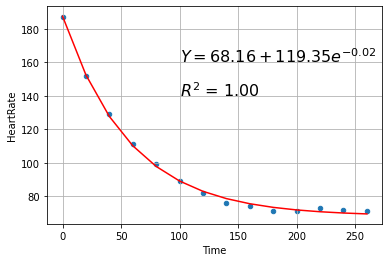

In [147]:
y_est = func4(x,popt4[0],popt4[1],popt4[2])

ax1 = df.plot(kind='scatter', x='Time', y='HeartRate', grid = True)
ax1 = plt.plot(x,y_est, color = 'r')
ax1 = plt.text(100, 160, r"$Y = %3.2f +  %3.2f e^{- %3.2f }$" % (popt4[0],popt4[1],popt4[2]), fontsize = 16)
ax1 = plt.text(100, 140, r"$R^2$ = %3.2f" % (np.corrcoef(y,y_est)[0,1])**2 , fontsize = 16)

In [100]:
np.corrcoef(x,y_est)

array([[ 1.      , -0.866606],
       [-0.866606,  1.      ]])

In [3]:
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


In [129]:
np.linspace(min(x),max(x),100)

array([  0.        ,   2.62626263,   5.25252525,   7.87878788,
        10.50505051,  13.13131313,  15.75757576,  18.38383838,
        21.01010101,  23.63636364,  26.26262626,  28.88888889,
        31.51515152,  34.14141414,  36.76767677,  39.39393939,
        42.02020202,  44.64646465,  47.27272727,  49.8989899 ,
        52.52525253,  55.15151515,  57.77777778,  60.4040404 ,
        63.03030303,  65.65656566,  68.28282828,  70.90909091,
        73.53535354,  76.16161616,  78.78787879,  81.41414141,
        84.04040404,  86.66666667,  89.29292929,  91.91919192,
        94.54545455,  97.17171717,  99.7979798 , 102.42424242,
       105.05050505, 107.67676768, 110.3030303 , 112.92929293,
       115.55555556, 118.18181818, 120.80808081, 123.43434343,
       126.06060606, 128.68686869, 131.31313131, 133.93939394,
       136.56565657, 139.19191919, 141.81818182, 144.44444444,
       147.07070707, 149.6969697 , 152.32323232, 154.94949495,
       157.57575758, 160.2020202 , 162.82828283, 165.45

In [1]:
df.columns

NameError: name 'df' is not defined